# Exercise 1 - Basic Norm Approximation

Consider the basic norm approximation problem

$$\displaystyle\min_x || Ax-b || \tag{1}$$

Tha data of the problem is given by

In [ ]:
import cvxpy as cp
import numpy as np

m = 100
n = 30
np.random.seed(1)
A = np.random.randn(m, n)
b = np.random.randn(m)

**Question 1:** Solve problem $(1)$ for the norms



1.   $\ell_1$-norm
2.   $\ell_2$-norm
3.   $\ell_\infty$-norm

You may find this useful https://www.cvxpy.org/tutorial/functions/index.html#scalar-functions

## Solution 1

In [ ]:
x = cp.Variable(n)

In [ ]:
objective_1 = cp.Minimize(cp.norm1(A@x-b))
objective_2 = cp.Minimize(cp.norm2(A@x-b))
objective_3 = cp.Minimize(cp.norm(A@x-b, "inf"))

In [ ]:
prob1 = cp.Problem(objective_1)
prob2 = cp.Problem(objective_2)
prob3 = cp.Problem(objective_3)

In [ ]:
print("L1 norm")
prob1.solve()
print("status:", prob1.status)
print("Optimal value", prob1.value)
print("Optimal var x :", x.value)
x_1 = x.value

L1 norm
status: optimal
Optimal value 58.3541343098558
Optimal var x : [ 0.00597016  0.12866676  0.00046055  0.09485549 -0.05603852 -0.043279
  0.32871706  0.01329277 -0.03189173 -0.13070151 -0.0836683  -0.04578268
 -0.04179762 -0.12144361  0.09157293  0.18556523  0.00387592 -0.02930064
  0.07243687 -0.08907623  0.04191256 -0.22432457 -0.1545783  -0.24784522
 -0.03543109 -0.02868336  0.11996305  0.33224336 -0.40499356  0.08653447]


In [ ]:
print("L2 norm")
prob2.solve()
print("status:", prob2.status)
print("Optimal value", prob2.value)
print("Optimal var x :", x.value)
x_2 = x.value

L2 norm
status: optimal
Optimal value 8.710488997430938
Optimal var x : [ 0.09211114  0.12378514 -0.03627341  0.0842883  -0.05368962  0.06737916
  0.21429139  0.15684597 -0.02126973  0.05830681  0.01441413  0.04799672
 -0.04891163 -0.11649284  0.09410055  0.08204682 -0.04740997 -0.00248834
 -0.04534811 -0.1128231   0.03143639 -0.20841396 -0.20833178 -0.16609704
  0.05853182 -0.04627497  0.14964816  0.05635963 -0.18863787  0.02544112]


In [ ]:
print("Linf norm")
prob3.solve()
print("status:", prob3.status)
print("Optimal value", prob3.value)
print("Optimal var x :", x.value)
x_3 = x.value

Linf norm
status: optimal
Optimal value 1.4923673432067295
Optimal var x : [ 0.22912296  0.24680539 -0.08587196 -0.02428041 -0.01004425  0.15645074
  0.24179898  0.44586877 -0.01340628  0.20175949  0.12495037 -0.03823267
  0.07774347 -0.18645087  0.10689199  0.13484414 -0.14471844  0.10315136
 -0.08192427 -0.11368871  0.06065994 -0.25305524 -0.32471452 -0.07527685
  0.19018136 -0.10217563  0.22324193 -0.13506464  0.05287277  0.12431246]


**Question 2:** Compute the residuals for each of the three norms (e.g. r_l1 = A @ x.value - b) and plot the three hystograms of the residuals. To plot the hystograms use the command

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
r_l1 = np.matmul(A,x_1) - b

In [ ]:
r_l2 = np.matmul(A,x_2) - b

In [ ]:
r_linf = np.matmul(A,x_3) - b

Text(0.5, 1.0, 'Residual l1')

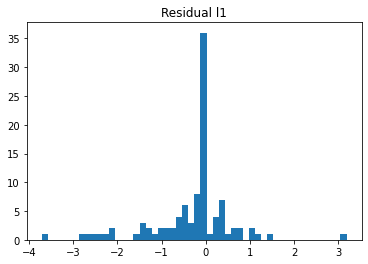

In [ ]:
plt.hist(r_l1, 50); # plot the hystogram of residual r_l1 with 50 bins
plt.title("Residual l1")

Text(0.5, 1.0, 'Residual l2')

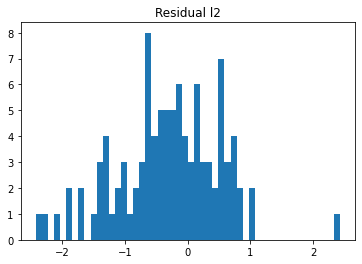

In [ ]:
plt.hist(r_l2, 50); # plot the hystogram of residual r_l1 with 50 bins
plt.title("Residual l2")

Text(0.5, 1.0, 'Residual linf')

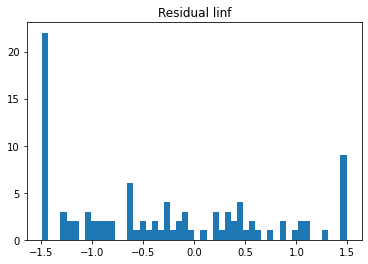

In [ ]:
plt.hist(r_linf, 100); # plot the hystogram of residual r_l1 with 50 bins
plt.title("Residual linf")

**Question 3:** Explain why the residuals are distributed the way they are in the $\ell_\infty$ case, and compare this distribution to that of the $\ell_1$ and $\ell_2$ cases.

L infinity norm tries minimise the absolute maximum error, so it pushes a lot of the residuals above the |1.5| boundaries to the boundareis. It doesn't care about the residuals below the maximum boundaries, so they seem to be roughly evenly spread.

In comparison the l2 norm weighs large residuals proportionally more than l1 and linifinty, so we see a lot of residuals around 0.

The l1 norm has a lot of zero residuals. Because the l1 cost function has a constant slope so there is always an incentive to push residuals to zero.
